### Dependencies

In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats
import sklearn
import matplotlib.pyplot as plt
from tqdm import tqdm

### Loading dataframes containing variables

In [ ]:
# Loading the dataframes we'll be using

# Contains the DEPENDENT variables relating to language PAIRS
lang_pair_dv = pd.read_csv('/Data/Bible experimental vars/bible_dependent_vars_LANGUAGE_PAIR.csv')

# Contains the INDEPENDENT variables relating to language PAIRS
lang_pair_iv = pd.read_csv('/Data/bible_predictors_LANGUAGE_PAIR.csv')

# Contains ALL variables relating to INDIVIDUAL languages
indiv_lang_vars = pd.read_csv('/Data/bible_all_features_LANGUAGE.csv')

In [ ]:
# Tallying zero-shot sub-cases

print('Simple zero-shot languages (LaBSE): {}'.format(sum(np.array(indiv_lang_vars['Total sentences (LaBSE)']==0))))
print('Simple zero-shot languages (LASER): {}'.format(sum(np.array(indiv_lang_vars['Total sentences (LASER)']==0))))
print('Double zero-shot language pairs (LaBSE): {}'.format(sum(np.array(lang_pair_iv['Combined sentences (LaBSE)']==0))))
print('Double zero-shot language pairs (LASER): {}'.format(sum(np.array(lang_pair_iv['Combined sentences (LASER)']==0))))

Simple zero-shot languages (LaBSE): 35
Simple zero-shot languages (LASER): 45
Double zero-shot language pairs (LaBSE): 595
Double zero-shot language pairs (LASER): 990


In [ ]:
# It's pretty helpful to combine the IVs and DVs for language pairs, as Pingouin prefers to work with 
# single dataframe objects
master_pair = pd.concat([lang_pair_iv, lang_pair_dv], axis=1)

In [ ]:
master_pair.corr()

,Combined sentences (LaBSE),Combined in-family sentences (LaBSE),Combined in-genus sentences (LaBSE),Combined sentences (LASER),Combined in-family sentences (LASER),Combined in-genus sentences (LASER),Same Family?,Same Genus?,"Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)","Token-level Overlap (multiset Jaccard coefficient, Book of John)",Same Word Order?,Same Polysynthesis Status?,Geographic Distance (lang2vec),Inventory Distance (lang2vec),Syntactic Distance (lang2vec),Phonological Distance (lang2vec),"F1-score (LaBSE, average)","F1-score (LASER, average)","Gromov-Hausdorff dist. (LaBSE, average)","Gromov-Hausdorff dist. (LASER, average)","Singular value gap (LaBSE, average)","Singular value gap (LASER, average)","ECOND-HM (LaBSE, average)","ECOND-HM (LASER, average)","Average margin score (LaBSE, average)","Average margin score (LASER, average)"
Combined sentences (LaBSE),1.000000,0.319249,0.487660,0.661324,0.316252,0.385381,0.156841,0.057036,-0.098686,0.163112,0.136264,0.176468,-0.128092,0.076060,-0.116656,-0.012324,0.342308,0.319571,-0.133809,-0.140277,-0.076661,-0.094841,-0.033423,-0.073367,0.296391,0.058348
Combined in-family sentences (LaBSE),0.319249,1.000000,0.801648,0.248638,0.932314,0.568533,0.556810,0.156956,0.083801,0.417382,0.186699,0.267901,-0.361955,-0.078940,-0.410544,-0.352096,0.494691,0.534981,-0.202363,-0.203547,-0.115121,-0.141424,-0.375093,-0.217196,0.396285,0.136211
Combined in-genus sentences (LaBSE),0.487660,0.801648,1.000000,0.358365,0.820832,0.800504,0.461591,0.190270,0.155000,0.425817,0.156551,0.249691,-0.301913,-0.041288,-0.370486,-0.277699,0.459315,0.526594,-0.177935,-0.184248,-0.107517,-0.133314,-0.306322,-0.237668,0.374820,0.130227
Combined sentences (LASER),0.661324,0.248638,0.358365,1.000000,0.267548,0.480509,0.142106,0.062654,0.111735,0.142176,0.093430,0.075458,-0.109527,0.013959,-0.108658,-0.061852,0.157359,0.128202,-0.064568,-0.068741,-0.032870,-0.041136,0.008450,0.070424,0.162198,-0.026162
Combined in-family sentences (LASER),0.316252,0.932314,0.820832,0.267548,1.000000,0.610484,0.518565,0.151550,0.181034,0.422686,0.197338,0.241435,-0.358079,-0.072992,-0.427531,-0.343077,0.448157,0.568997,-0.190656,-0.195905,-0.100387,-0.126759,-0.353728,-0.292710,0.362068,0.144876
Combined in-genus sentences (LASER),0.385381,0.568533,0.800504,0.480509,0.610484,1.000000,0.331247,0.148153,0.230004,0.302854,0.056893,0.153011,-0.211040,0.031153,-0.245886,-0.160460,0.296285,0.347033,-0.084494,-0.097817,-0.065737,-0.082007,-0.210256,-0.112418,0.249414,0.065210
Same Family?,0.156841,0.556810,0.461591,0.142106,0.518565,0.331247,1.000000,0.464272,0.142928,0.356942,0.204930,0.235862,-0.375254,-0.220503,-0.478111,-0.348164,0.331630,0.459289,-0.138782,-0.126854,-0.044128,-0.056779,-0.199852,-0.109419,0.302019,0.110437
Same Genus?,0.057036,0.156956,0.190270,0.062654,0.151550,0.148153,0.464272,1.000000,0.174027,0.206415,0.137293,0.104328,-0.167888,-0.210392,-0.292448,-0.150551,0.129983,0.208714,-0.067563,-0.060175,-0.015971,-0.029778,-0.062283,-0.011053,0.126337,0.040769
"Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)",-0.098686,0.083801,0.155000,0.111735,0.181034,0.230004,0.142928,0.174027,1.000000,0.250565,0.072285,0.030696,-0.077818,-0.236850,-0.149461,-0.073093,0.029063,0.134336,-0.106150,-0.131058,-0.226793,-0.268181,0.097069,0.054790,0.128369,0.044302
"Token-level Overlap (multiset Jaccard coefficient, Book of John)",0.163112,0.417382,0.425817,0.142176,0.422686,0.302854,0.356942,0.206415,0.250565,1.000000,0.210295,0.294600,-0.350034,-0.203511,-0.332701,-0.309709,0.543210,0.480759,-0.068893,-0.041157,-0.073546,-0.040084,-0.070784,-0.106394,0.376943,0.175894


In [ ]:
pg.ancova(data=master_pair, 
          dv='F1-score (LASER, average)', 
          between='Same Genus?',
          covar=['Combined sentences (LASER)', 
                 'Combined in-family sentences (LASER)',
                 'Combined in-genus sentences (LASER)'])

,Source,SS,DF,F,p-unc,np2
0,Same Genus?,2.741650,1,117.647836,4.115628e-27,0.022788
1,Combined sentences (LASER),0.123803,1,5.312566,2.121256e-02,0.001052
2,Combined in-family sentences (LASER),34.260927,1,1470.181837,1.625824e-282,0.225655
3,Combined in-genus sentences (LASER),0.001143,1,0.049039,8.247530e-01,0.000010
4,Residual,117.568026,5045,NaN,NaN,NaN


In [ ]:
pg.partial_corr(data=master_pair,
                x='Phonological Distance (lang2vec)',
                y='Average margin score (LASER, average)',
                covar=['Combined sentences (LASER)',
                       'Combined in-family sentences (LASER)',
                       'Combined in-genus sentences (LASER)'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,5050,-0.024031,"[-0.05, 0.0]",0.000577,0.000181,0.087726,0.076,0.400525


In [ ]:
double_zero_shot_labse = master_pair[np.array(master_pair['Combined sentences (LaBSE)'])==0]
double_zero_shot_laser = master_pair[np.array(master_pair['Combined sentences (LASER)'])==0]

In [ ]:
double_zero_shot_labse['Gromov-Hausdorff dist. (LaBSE, average)'] = -double_zero_shot_labse['Gromov-Hausdorff dist. (LaBSE, average)']
double_zero_shot_labse['Gromov-Hausdorff dist. (LASER, average)'] = -double_zero_shot_laser['Gromov-Hausdorff dist. (LASER, average)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
double_zero_shot_labse['Singular value gap (LaBSE, average)'] = -double_zero_shot_labse['Singular value gap (LaBSE, average)']
double_zero_shot_laser['Singular value gap (LASER, average)'] = -double_zero_shot_laser['Singular value gap (LASER, average)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
double_zero_shot_labse = double_zero_shot_labse[['Same Family?', 'Same Genus?', 
                                                 'Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)',
                                                 'Token-level Overlap (multiset Jaccard coefficient, Book of John)',
                                                 'Same Word Order?', 'Same Polysynthesis Status?',	'Geographic Distance (lang2vec)',
                                                 'Inventory Distance (lang2vec)',	'Syntactic Distance (lang2vec)',
                                                 'Phonological Distance (lang2vec)', 'F1-score (LaBSE, average)',	
                                                 'Gromov-Hausdorff dist. (LaBSE, average)',
                                                 'Singular value gap (LaBSE, average)',
                                                 'ECOND-HM (LaBSE, average)',
                                                 'Average margin score (LaBSE, average)', 'Language pair']]

double_zero_shot_laser = double_zero_shot_laser[['Same Family?', 'Same Genus?', 
                                                 'Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)',
                                                 'Token-level Overlap (multiset Jaccard coefficient, Book of John)',
                                                 'Same Word Order?', 'Same Polysynthesis Status?',	'Geographic Distance (lang2vec)',
                                                 'Inventory Distance (lang2vec)',	'Syntactic Distance (lang2vec)',
                                                 'Phonological Distance (lang2vec)', 'F1-score (LASER, average)',	
                                                 'Gromov-Hausdorff dist. (LASER, average)',
                                                 'Singular value gap (LASER, average)',
                                                 'ECOND-HM (LASER, average)',
                                                 'Average margin score (LASER, average)', 'Language pair']]

In [ ]:
print(pg.anova(data=double_zero_shot_labse, dv='F1-score (LaBSE, average)', between='Same Word Order?'))
print(pg.anova(data=double_zero_shot_labse, dv='F1-score (LaBSE, average)', between='Same Polysynthesis Status?'))
print(pg.anova(data=double_zero_shot_labse, dv='F1-score (LaBSE, average)', between='Same Family?'))
print(pg.anova(data=double_zero_shot_labse, dv='F1-score (LaBSE, average)', between='Same Genus?'))

In [ ]:
print(scipy.stats.pearsonr(double_zero_shot_labse['F1-score (LaBSE, average)'], 
                     double_zero_shot_labse['Syntactic Distance (lang2vec)']))

In [ ]:
def corrUtilIO(corr: tuple, s1:str, s2:str):
  r, p = corr
  out = 'Correlation between {} and {}: {} | p-value: {}'.format(s1, s2, r, p)
  return out

In [ ]:
print('Examining double-zero shot language pairs (LaBSE)')
print('--------------------------------------------------')
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_labse['F1-score (LaBSE, average)'], 
                                      double_zero_shot_labse['Inventory Distance (lang2vec)']), 
                                      'F1-score', 'inventory distance'))
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_labse['Gromov-Hausdorff dist. (LaBSE, average)'], 
                                      double_zero_shot_labse['Inventory Distance (lang2vec)']), 
                                      'Gromov-Hausdorff distance', 'inventory distance'))
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_labse['Singular value gap (LaBSE, average)'], 
                                      double_zero_shot_labse['Inventory Distance (lang2vec)']), 
                                      'singular value gap', 'inventory distance'))
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_labse['ECOND-HM (LaBSE, average)'], 
                                      double_zero_shot_labse['Inventory Distance (lang2vec)']), 
                                      'ECOND-HM', 'inventory distance'))
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_labse['Average margin score (LaBSE, average)'], 
                                      double_zero_shot_labse['Inventory Distance (lang2vec)']), 
                                      'average margin score', 'inventory distance'))

Examining double-zero shot language pairs (LaBSE)
--------------------------------------------------
Correlation between F1-score and inventory distance: -0.33724823383287633 | p-value: 2.7175319027258977e-17
Correlation between Gromov-Hausdorff distance and inventory distance: -0.0686797479579177 | p-value: 0.09418309896867325
Correlation between singular value gap and inventory distance: -0.2207380504269484 | p-value: 5.31897763102463e-08
Correlation between ECOND-HM and inventory distance: -0.3930150872874848 | p-value: 2.0514426878687908e-23
Correlation between average margin score and inventory distance: -0.3048283011613173 | p-value: 2.925467934356142e-14


In [ ]:
X_to_regress_1 = ['Inventory Distance (lang2vec)', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)']
X_to_regress_2 = ['Inventory Distance (lang2vec)', 'Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)']

In [ ]:
pg.linear_regression(X=double_zero_shot_labse[X_to_regress_2], y=double_zero_shot_labse['F1-score (LaBSE, average)'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.091118,0.009973,9.136109,1.020272e-18,0.439698,0.437805,0.071530,0.110705
1,Inventory Distance (lang2vec),-0.195481,0.028141,-6.946500,9.895264e-12,0.439698,0.437805,-0.250749,-0.140213
2,Character-level Overlap (multiset Jaccard coef...,0.243819,0.013138,18.558068,6.108553e-61,0.439698,0.437805,0.218016,0.269622


In [ ]:
print('Examining double-zero shot language pairs (LASER)')
print('--------------------------------------------------')
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_laser['F1-score (LASER, average)'], 
                                      double_zero_shot_laser['Inventory Distance (lang2vec)']), 
                                      'F1-score', 'inventory distance'))
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_laser['Gromov-Hausdorff dist. (LASER, average)'], 
                                      double_zero_shot_laser['Inventory Distance (lang2vec)']), 
                                      'Gromov-Hausdorff distance', 'inventory distance'))
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_laser['Singular value gap (LASER, average)'], 
                                      double_zero_shot_laser['Inventory Distance (lang2vec)']), 
                                      'singular value gap', 'inventory distance'))
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_laser['ECOND-HM (LASER, average)'], 
                                      double_zero_shot_laser['Inventory Distance (lang2vec)']), 
                                      'ECOND-HM', 'inventory distance'))
print(corrUtilIO(scipy.stats.pearsonr(double_zero_shot_laser['Average margin score (LASER, average)'], 
                                      double_zero_shot_laser['Inventory Distance (lang2vec)']), 
                                      'average margin score', 'inventory distance'))

Examining double-zero shot language pairs (LASER)
--------------------------------------------------
Correlation between F1-score and inventory distance: -0.127669949469008 | p-value: 5.6142950992676594e-05
Correlation between Gromov-Hausdorff distance and inventory distance: 0.050291835337428856 | p-value: 0.11378722704645745
Correlation between singular value gap and inventory distance: -0.07911088506905038 | p-value: 0.012777024986595574
Correlation between ECOND-HM and inventory distance: 0.1440475335405774 | p-value: 5.355038479530176e-06
Correlation between average margin score and inventory distance: -0.09227268163614558 | p-value: 0.0036628574255727206


In [ ]:
simple_zero_shot_labse = indiv_lang_vars[np.array(indiv_lang_vars['Total sentences (LaBSE)'])==0]
simple_zero_shot_laser = indiv_lang_vars[np.array(indiv_lang_vars['Total sentences (LASER)'])==0]

simple_zero_shot_labse = simple_zero_shot_labse.drop(['Total sentences (LaBSE)', 'Total in-family sentences (LaBSE)', 
                             'Total in-genus sentences (LaBSE)', 'Total sentences (LASER)', 
                             'Total in-family sentences (LASER)', 'Total in-genus sentences (LASER)',
                             'Average F1 (LASER)', 'Average G-H dist. (LASER)', 'Average SVG (LASER)',
                             'Average ECOND-HM (LASER)', 'Grand mean margin score (LASER)'], axis=1)

simple_zero_shot_laser = simple_zero_shot_laser.drop(['Total sentences (LaBSE)', 'Total in-family sentences (LaBSE)', 
                             'Total in-genus sentences (LaBSE)', 'Total sentences (LASER)', 
                             'Total in-family sentences (LASER)', 'Total in-genus sentences (LASER)',
                             'Average F1 (LaBSE)', 'Average G-H dist. (LaBSE)', 'Average SVG (LaBSE)',
                             'Average ECOND-HM (LaBSE)', 'Grand mean margin score (LaBSE)'], axis=1)

In [ ]:
print('Running ANOVAs to check for omnibus group mean differences in the DVs for basic word order')
print(pg.anova(data=simple_zero_shot_labse, dv='Average F1 (LaBSE)', between='Basic Word Order', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average G-H dist. (LaBSE)', between='Basic Word Order', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average SVG (LaBSE)', between='Basic Word Order', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average ECOND-HM (LaBSE)', between='Basic Word Order', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Grand mean margin score (LaBSE)', between='Basic Word Order', ss_type=3))
print('\n')
print('Running ANOVAs to check for omnibus group mean differences in the DVs for polysyntheticity')
print(pg.anova(data=simple_zero_shot_labse, dv='Average F1 (LaBSE)', between='Polysynthetic?', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average G-H dist. (LaBSE)', between='Polysynthetic?', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average SVG (LaBSE)', between='Polysynthetic?', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average ECOND-HM (LaBSE)', between='Polysynthetic?', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Grand mean margin score (LaBSE)', between='Polysynthetic?', ss_type=3))
print('\n')
print('Running ANOVAs to check for omnibus group mean differences in the DVs for family')
print(pg.anova(data=simple_zero_shot_labse, dv='Average F1 (LaBSE)', between='Family', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average G-H dist. (LaBSE)', between='Family', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average SVG (LaBSE)', between='Family', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average ECOND-HM (LaBSE)', between='Family', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Grand mean margin score (LaBSE)', between='Family', ss_type=3))
print('\n')
print('Running ANOVAs to check for omnibus group mean differences in the DVs for genus')
print(pg.anova(data=simple_zero_shot_labse, dv='Average F1 (LaBSE)', between='Genus', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average G-H dist. (LaBSE)', between='Genus', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average SVG (LaBSE)', between='Genus', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average ECOND-HM (LaBSE)', between='Genus', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Grand mean margin score (LaBSE)', between='Genus', ss_type=3))
print('\n')
print('Running ANOVAs to check for omnibus group mean differences in the DVs for script')
print(pg.anova(data=simple_zero_shot_labse, dv='Average F1 (LaBSE)', between='Script', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average G-H dist. (LaBSE)', between='Script', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average SVG (LaBSE)', between='Script', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Average ECOND-HM (LaBSE)', between='Script', ss_type=3))
print(pg.anova(data=simple_zero_shot_labse, dv='Grand mean margin score (LaBSE)', between='Script', ss_type=3))

Running ANOVAs to check for omnibus group mean differences in the DVs for basic word order
             Source  ddof1  ddof2         F     p-unc       np2
0  Basic Word Order      7     27  2.198701  0.066555  0.363071
             Source  ddof1  ddof2         F     p-unc       np2
0  Basic Word Order      7     27  1.396682  0.247187  0.265841
             Source  ddof1  ddof2         F     p-unc       np2
0  Basic Word Order      7     27  0.450401  0.861108  0.104561
             Source  ddof1  ddof2         F     p-unc       np2
0  Basic Word Order      7     27  2.199274  0.066492  0.363131
             Source  ddof1  ddof2         F     p-unc       np2
0  Basic Word Order      7     27  1.715491  0.147461  0.307842


Running ANOVAs to check for omnibus group mean differences in the DVs for polysyntheticity
           Source  ddof1  ddof2         F     p-unc       np2
0  Polysynthetic?      1     33  0.220212  0.641964  0.006629
           Source  ddof1  ddof2         F     p-unc 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Basic word order')

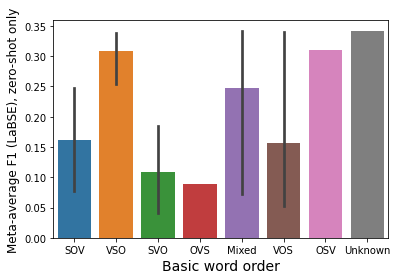

In [ ]:
sns.barplot(simple_zero_shot_labse['Basic Word Order'], simple_zero_shot_labse['Average F1 (LaBSE)'])
plt.ylabel('Meta-average F1 (LaBSE), zero-shot only', fontsize=12)
plt.xlabel('Basic word order', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Basic word order')

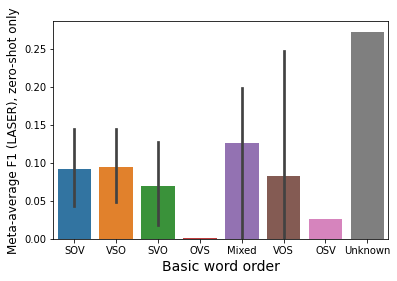

In [ ]:
sns.barplot(simple_zero_shot_laser['Basic Word Order'], simple_zero_shot_laser['Average F1 (LASER)'])
plt.ylabel('Meta-average F1 (LASER), zero-shot only', fontsize=12)
plt.xlabel('Basic word order', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Basic word order')

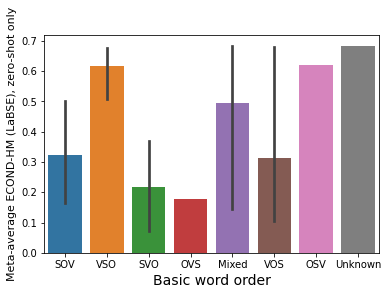

In [ ]:
sns.barplot(simple_zero_shot_labse['Basic Word Order'], simple_zero_shot_labse['Average ECOND-HM (LaBSE)'])
plt.ylabel('Meta-average ECOND-HM (LaBSE), zero-shot only', fontsize=11)
plt.xlabel('Basic word order', fontsize=14)

In [ ]:
pg.pairwise_tukey(data=simple_zero_shot_labse, dv='Average F1 (LaBSE)', between='Basic Word Order')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Mixed,OSV,0.247000,0.309500,-0.062500,0.142959,-0.437189,0.900000,-0.288470
1,Mixed,OVS,0.247000,0.088300,0.158700,0.142959,1.110112,0.900000,0.732484
2,Mixed,SOV,0.247000,0.162290,0.084710,0.081499,1.039400,0.900000,0.636481
3,Mixed,SVO,0.247000,0.108014,0.138986,0.085434,1.626818,0.705843,1.013971
4,Mixed,Unknown,0.247000,0.342000,-0.095000,0.142959,-0.664528,0.900000,-0.438475
5,Mixed,VOS,0.247000,0.156500,0.090500,0.101087,0.895268,0.900000,0.584787
6,Mixed,VSO,0.247000,0.308444,-0.061444,0.082537,-0.744446,0.900000,-0.458120
7,OSV,OVS,0.309500,0.088300,0.221200,0.175088,1.263366,0.900000,7.146677
8,OSV,SOV,0.309500,0.162290,0.147210,0.129849,1.133705,0.900000,1.087122
9,OSV,SVO,0.309500,0.108014,0.201486,0.132354,1.522325,0.763571,1.415160


In [ ]:
pg.pairwise_tukey(data=simple_zero_shot_laser, dv='Average F1 (LASER)', between='Basic Word Order')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Mixed,OSV,0.126300,0.025400,0.100900,0.116725,0.864425,0.900000,0.570372
1,Mixed,OVS,0.126300,0.001500,0.124800,0.116725,1.069180,0.900000,0.705476
2,Mixed,SOV,0.126300,0.092100,0.034200,0.064312,0.531780,0.900000,0.321120
3,Mixed,SVO,0.126300,0.069783,0.056517,0.065251,0.866139,0.900000,0.526203
4,Mixed,Unknown,0.126300,0.272100,-0.145800,0.116725,-1.249090,0.900000,-0.824185
5,Mixed,VOS,0.126300,0.082700,0.043600,0.082537,0.528248,0.900000,0.345050
6,Mixed,VSO,0.126300,0.094670,0.031630,0.066543,0.475328,0.900000,0.291069
7,OSV,OVS,0.025400,0.001500,0.023900,0.142958,0.167182,0.900000,0.945722
8,OSV,SOV,0.025400,0.092100,-0.066700,0.104635,-0.637455,0.900000,-0.621015
9,OSV,SVO,0.025400,0.069783,-0.044383,0.105215,-0.421837,0.900000,-0.408429


### Experimenting with sklearn models for feature selection



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from itertools import chain, combinations # Used for exhaustive feature search

In [ ]:
# The model we'll use to choose the best features for predicting F1-score for LaBSE
labse_f1_model = LinearRegression()

In [ ]:
# All the possible pair-centric LaBSE IVs
labse_pair_iv = ['Combined sentences (LaBSE)', 'Combined in-family sentences (LaBSE)',
                 'Combined in-genus sentences (LaBSE)', 'Same Family?', 'Same Genus?',
                 'Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)',
                 'Token-level Overlap (multiset Jaccard coefficient, Book of John)',
                 'Same Word Order?', 'Same Polysynthesis Status?', 
                 'Geographic Distance (lang2vec)', 'Syntactic Distance (lang2vec)',
                 'Phonological Distance (lang2vec)', 'Inventory Distance (lang2vec)']
X_pair_labse = master_pair[labse_pair_iv]

# The first DV we'll look at
y_pair_f1_labse = master_pair['F1-score (LaBSE, average)']

In [ ]:
# Exhaustive feature search on language pair features
def getBestFeatures(model, X, y, score_method):
  FOLDS = 10
  n_features = X.shape[1]
  all_subsets = chain.from_iterable(combinations(range(n_features), k) for k in range(n_features+1))

  best_score = -np.inf
  best_features = None
  for subset in all_subsets:
    if len(subset)!=0: # Search over all non-empty subsets of features  
      score_by_fold = sklearn.model_selection.cross_validate(model, 
                                                         X.iloc[:, np.array(subset)], 
                                                         y, 
                                                         cv=FOLDS, 
                                                         scoring=score_method)['test_score']
                                                         #scoring='neg_mean_squared_error')

      # Convert R2 to adjusted R2 to take into account the number of predictors
      def adjustedR2(r2, n, p):
        num = (1-r2)*(n-1)
        denom = n-p-1
        adj_r2 = 1 - (num/denom)
        return adj_r2
      
      if score_method=='r2':
        # Compute the adjusted R2 instead
        n_subset_features = len(subset)
        # Fraction of data used for training during CV
        train_frac = (FOLDS-1) / FOLDS # e.g. with 10 folds, we use 9/10 of the data for training
        sample_size = round(train_frac*X.shape[0])
        score_by_fold = list(map(lambda r2: adjustedR2(r2,sample_size,n_subset_features), score_by_fold)) #[adjustedR2(r2, n_subset_features, sample_size) for r2 in score_by_fold]

      score = np.average(score_by_fold)

      # If score is current optimum . . .
      if score > best_score:
        best_score, best_features = score, subset # . . . flag it as such
        print('Score: {} Features: {}'.format(best_score, [X.columns[i] for i in best_features]))

  best_features = [X.columns[i] for i in best_features] # Return just the best features
  return best_features

In [ ]:
labse_pair_f1_best_features = getBestFeatures(model=labse_f1_model, 
                                              X=X_pair_labse, 
                                              y=y_pair_f1_labse,
                                              score_method='r2') # really adjusted R2

Score: 0.04128646949432839 Features: ['Combined sentences (LaBSE)']
Score: 0.17838707077008623 Features: ['Combined in-family sentences (LaBSE)']
Score: 0.22443671542909233 Features: ['Token-level Overlap (multiset Jaccard coefficient, Book of John)']
Score: 0.2941476121717451 Features: ['Combined sentences (LaBSE)', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)']
Score: 0.3153931783656644 Features: ['Combined in-family sentences (LaBSE)', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)']
Score: 0.3386625149111925 Features: ['Token-level Overlap (multiset Jaccard coefficient, Book of John)', 'Same Polysynthesis Status?']
Score: 0.3492214395987304 Features: ['Combined sentences (LaBSE)', 'Combined in-family sentences (LaBSE)', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)']
Score: 0.3872478837547058 Features: ['Combined sentences (LaBSE)', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)', 'Same Polysynthesis Sta

In [ ]:
# Repeating the same process for LASER

# All the possible pair-centric LASER IVs
laser_pair_iv = ['Combined sentences (LASER)', 'Combined in-family sentences (LASER)',
                 'Combined in-genus sentences (LASER)', 'Same Family?', 'Same Genus?',
                 'Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)',
                 'Token-level Overlap (multiset Jaccard coefficient, Book of John)',
                 'Same Word Order?', 'Same Polysynthesis Status?', 
                 'Geographic Distance (lang2vec)', 'Syntactic Distance (lang2vec)',
                 'Phonological Distance (lang2vec)', 'Inventory Distance (lang2vec)']
X_pair_laser = master_pair[laser_pair_iv]

# The first DV we'll look at (for LASER)
y_pair_f1_laser = master_pair['F1-score (LASER, average)']

In [ ]:
laser_f1_model = LinearRegression()

In [ ]:
laser_pair_f1_best_features = getBestFeatures(model=laser_f1_model, 
                                              X=X_pair_laser, 
                                              y=y_pair_f1_laser, 
                                              score_method='r2')

Score: -0.01978130854908604 Features: ['Combined sentences (LASER)']
Score: 0.25089903587019724 Features: ['Combined in-family sentences (LASER)']
Score: 0.2781519844206934 Features: ['Combined in-family sentences (LASER)', 'Same Family?']
Score: 0.31903495057038245 Features: ['Combined in-family sentences (LASER)', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)']
Score: 0.3316275968804237 Features: ['Combined in-family sentences (LASER)', 'Same Family?', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)']
Score: 0.3482534147350469 Features: ['Combined in-family sentences (LASER)', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)', 'Same Word Order?']
Score: 0.35438798384031955 Features: ['Combined in-family sentences (LASER)', 'Token-level Overlap (multiset Jaccard coefficient, Book of John)', 'Syntactic Distance (lang2vec)']
Score: 0.36074765639270434 Features: ['Combined in-family sentences (LASER)', 'Same Family?', 'Token-level Ov

In [ ]:
# Overlapping best predictors
set(laser_pair_f1_best_features)&set(labse_pair_f1_best_features)

{'Geographic Distance (lang2vec)',
 'Same Polysynthesis Status?',
 'Token-level Overlap (multiset Jaccard coefficient, Book of John)'}

In [ ]:
# Checking out the best predictors for the other DVs

# LaBSE
y_pair_gh_labse = master_pair['Gromov-Hausdorff dist. (LaBSE, average)']
y_pair_svg_labse = master_pair['Singular value gap (LaBSE, average)']
y_pair_econdhm_labse = master_pair['ECOND-HM (LaBSE, average)']
y_pair_avgmarg_labse = master_pair['Average margin score (LaBSE, average)']
labse_gh_model, labse_svg_model, labse_econdhm_model, labse_avgmarg_model = LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()

# LASER
y_pair_gh_laser = master_pair['Gromov-Hausdorff dist. (LASER, average)']
y_pair_svg_laser = master_pair['Singular value gap (LASER, average)']
y_pair_econdhm_laser = master_pair['ECOND-HM (LASER, average)']
y_pair_avgmarg_laser = master_pair['Average margin score (LASER, average)']
laser_gh_model, laser_svg_model, laser_econdhm_model, laser_avgmarg_model = LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()

In [ ]:
# LaBSE best feature selection
print('Getting best features for LaBSE, GH')
labse_pair_gh_best_features = getBestFeatures(labse_gh_model, X_pair_labse, y_pair_gh_labse, 'r2')
print('Getting best features for LaBSE, SVG')
labse_pair_svg_best_features = getBestFeatures(labse_svg_model, X_pair_labse, y_pair_svg_labse, 'r2')
print('Getting best features for LaBSE, ECOND-HM')
labse_pair_econdhm_best_features = getBestFeatures(labse_econdhm_model, X_pair_labse, y_pair_econdhm_labse, 'r2')
print('Getting best features for LaBSE, avg. margin score')
labse_pair_avgmarg_best_features = getBestFeatures(labse_avgmarg_model, X_pair_labse, y_pair_avgmarg_labse, 'r2')

# LASER best feature selection
print('Getting best features for LASER, GH')
laser_pair_gh_best_features = getBestFeatures(laser_gh_model, X_pair_laser, y_pair_gh_laser, 'r2')
print('Getting best features for LASER, SVG')
laser_pair_svg_best_features = getBestFeatures(laser_svg_model, X_pair_laser, y_pair_svg_laser, 'r2')
print('Getting best features for LASER, ECOND-HM')
laser_pair_econdhm_best_features = getBestFeatures(laser_econdhm_model, X_pair_laser, y_pair_econdhm_laser, 'r2')
print('Getting best features for LASER, avg. margin score')
laser_pair_avgmarg_best_features = getBestFeatures(laser_avgmarg_model, X_pair_laser, y_pair_avgmarg_laser, 'r2')

Getting best features for LaBSE, GH
Score: -0.0413396886380951 Features: ['Combined sentences (LaBSE)']
Score: -0.021350223866934324 Features: ['Combined in-family sentences (LaBSE)']
Score: -0.01679224278785668 Features: ['Combined sentences (LaBSE)', 'Combined in-family sentences (LaBSE)']
Score: -0.002414935334796575 Features: ['Combined in-family sentences (LaBSE)', 'Same Word Order?']
Score: 0.0003457227233038096 Features: ['Combined sentences (LaBSE)', 'Combined in-family sentences (LaBSE)', 'Same Word Order?']
Score: 0.0042619988612207175 Features: ['Combined in-family sentences (LaBSE)', 'Same Word Order?', 'Same Polysynthesis Status?']
Score: 0.006178065339854944 Features: ['Combined sentences (LaBSE)', 'Combined in-family sentences (LaBSE)', 'Same Word Order?', 'Same Polysynthesis Status?']
Score: 0.007388992714442766 Features: ['Combined sentences (LaBSE)', 'Combined in-family sentences (LaBSE)', 'Same Word Order?', 'Same Polysynthesis Status?', 'Geographic Distance (lang2ve

### Applying PCA as an additional feature selection tool

In [ ]:
pca = sklearn.decomposition.PCA(n_components=5)
labse_pair_pca = pca.fit_transform(X_pair_labse)

In [ ]:
labse_pair_pca.shape

(5050, 5)

### PCR

In [ ]:
# Implement principal component regression (PCR)
def PCR(model, X, y, n_components, score_method):
    FOLDS = 10
    pca = sklearn.decomposition.PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    score_by_fold = sklearn.model_selection.cross_validate(model, 
                                                         X_pca, 
                                                         y, 
                                                         cv=FOLDS, 
                                                         scoring=score_method)['test_score']
    # Convert R2 to adjusted R2 to take into account the number of predictors
    def adjustedR2(r2, n, p):
        num = (1-r2)*(n-1)
        denom = n-p-1
        adj_r2 = 1 - (num/denom)
        return adj_r2
      
    if score_method=='r2':
        # Compute the adjusted R2 instead
        n_subset_features = X.shape[1]
        # Fraction of data used for training during CV
        train_frac = (FOLDS-1) / FOLDS # e.g. with 10 folds, we use 9/10 of the data for training
        sample_size = round(train_frac*X.shape[0])
        score_by_fold = list(map(lambda r2: adjustedR2(r2,sample_size,n_subset_features), score_by_fold)) #[adjustedR2(r2, n_subset_features, sample_size) for r2 in score_by_fold]

    score = np.average(score_by_fold)                                     
    return score

In [ ]:
def optimizeComponentsPCR(X, y, score_method):
  score_list = []
  for n in range(1, X.shape[1]+1):
    lr_model = LinearRegression()
    score_n = PCR(lr_model, X, y, n, score_method)
    score_list.append(score_n)
    print('Number of components: {} | Score: {}'.format(n, score_n))
  return max(enumerate(score_list), key=lambda x: x[1])[0]+1

In [ ]:
# Computing the optimal number of components for predicting each of our DVs (LaBSE)

labse_best_components = []

print('Getting best number of components for predicting F1-score (LaBSE)')
res1 = optimizeComponentsPCR(X_pair_labse, y_pair_f1_labse, 'r2')
print('Optimal components: {}'.format(res1))
labse_best_components.append(res1)

print('Getting best number of components for predicting G-H dist. (LaBSE)')
res2 = optimizeComponentsPCR(X_pair_labse, y_pair_gh_labse, 'r2')
print('Optimal components: {}'.format(res2))
labse_best_components.append(res2)

print('Getting best number of components for predicting SVG (LaBSE)')
res3 = optimizeComponentsPCR(X_pair_labse, y_pair_svg_labse, 'r2')
print('Optimal components: {}'.format(res3))
labse_best_components.append(res3)

print('Getting best number of components for predicting ECOND-HM (LaBSE)')
res4 = optimizeComponentsPCR(X_pair_labse, y_pair_econdhm_labse, 'r2')
print('Optimal components: {}'.format(res4))
labse_best_components.append(res4)

print('Getting best number of components for predicting avg. margin score (LaBSE)')
res5 = optimizeComponentsPCR(X_pair_labse, y_pair_avgmarg_labse, 'r2')
print('Optimal components: {}'.format(res5))
labse_best_components.append(res5)

print('\nAverage best number of components (LaBSE): {}'.format(np.average(labse_best_components)))

Getting best number of components for predicting F1-score (LaBSE)
Number of components: 1 | Score: 0.17972379521571577
Number of components: 2 | Score: 0.1901240819549382
Number of components: 3 | Score: 0.21476442655085473
Number of components: 4 | Score: 0.29956825492307526
Number of components: 5 | Score: 0.34289235673145446
Number of components: 6 | Score: 0.3421048165496681
Number of components: 7 | Score: 0.3372982915953129
Number of components: 8 | Score: 0.3360520687440106
Number of components: 9 | Score: 0.3335706883430518
Number of components: 10 | Score: 0.3312733377591113
Number of components: 11 | Score: 0.4039158484777078
Number of components: 12 | Score: 0.4075171131971723
Number of components: 13 | Score: 0.4070012098494723
Optimal components: 12
Getting best number of components for predicting G-H dist. (LaBSE)
Number of components: 1 | Score: -0.023450041867626937
Number of components: 2 | Score: -0.022016428319914638
Number of components: 3 | Score: -0.01988442193991

In [ ]:
# Computing the optimal number of components for predicting each of our DVs (LASER)

laser_best_components = []

print('Getting best number of components for predicting F1-score (LASER)')
res1 = optimizeComponentsPCR(X_pair_laser, y_pair_f1_laser, 'r2')
print('Optimal components: {}'.format(res1))
laser_best_components.append(res1)

print('Getting best number of components for predicting G-H dist. (LASER)')
res2 = optimizeComponentsPCR(X_pair_laser, y_pair_gh_laser, 'r2')
print('Optimal components: {}'.format(res2))
laser_best_components.append(res2)

print('Getting best number of components for predicting SVG (LASER)')
res3 = optimizeComponentsPCR(X_pair_laser, y_pair_svg_laser, 'r2')
print('Optimal components: {}'.format(res3))
laser_best_components.append(res3)

print('Getting best number of components for predicting ECOND-HM (LASER)')
res4 = optimizeComponentsPCR(X_pair_laser, y_pair_econdhm_laser, 'r2')
print('Optimal components: {}'.format(res4))
laser_best_components.append(res4)

print('Getting best number of components for predicting avg. margin score (LASER)')
res5 = optimizeComponentsPCR(X_pair_laser, y_pair_avgmarg_laser, 'r2')
print('Optimal components: {}'.format(res5))
laser_best_components.append(res5)

print('\nAverage best number of components (LASER): {}'.format(np.average(laser_best_components)))

Getting best number of components for predicting F1-score (LASER)
Number of components: 1 | Score: 0.25132995699234767
Number of components: 2 | Score: 0.24533497663419532
Number of components: 3 | Score: 0.24429672952637901
Number of components: 4 | Score: 0.32625652037710645
Number of components: 5 | Score: 0.324452619728815
Number of components: 6 | Score: 0.33632049976740347
Number of components: 7 | Score: 0.3330385036809088
Number of components: 8 | Score: 0.3315329782183334
Number of components: 9 | Score: 0.34004006789883046
Number of components: 10 | Score: 0.3454269658345027
Number of components: 11 | Score: 0.37131678954138614
Number of components: 12 | Score: 0.36917892682023223
Number of components: 13 | Score: 0.36910899491731164
Optimal components: 11
Getting best number of components for predicting G-H dist. (LASER)
Number of components: 1 | Score: -0.015035956926025273
Number of components: 2 | Score: -0.015123503675341422
Number of components: 3 | Score: -0.0138557882

In [ ]:
# Perform ablation analysis to see how removing each predictor individually affects the regression fit
def ablateLinReg(X, y, score_method):
  FOLDS = 10
  n_features = X.shape[1]
  ablation_feature_diffs = {}

  model = LinearRegression()

  # Convert R2 to adjusted R2 to take into account the number of predictors
  def adjustedR2(r2, n, p):
    num = (1-r2)*(n-1)
    denom = n-p-1
    adj_r2 = 1 - (num/denom)
    return adj_r2

  # Getting baseline score using all the features
  score_by_fold = sklearn.model_selection.cross_validate(model,
                                                         X,
                                                         y,
                                                         cv=FOLDS,
                                                         scoring=score_method)['test_score']
  if score_method=='r2':
        # Compute the adjusted R2 instead
        N = n_features-1
        # Fraction of data used for training during CV
        train_frac = (FOLDS-1) / FOLDS # e.g. with 10 folds, we use 9/10 of the data for training
        sample_size = round(train_frac*X.shape[0])
        score_by_fold = list(map(lambda r2: adjustedR2(r2, sample_size, N), score_by_fold))  
  baseline_score = np.average(score_by_fold)                                                    
                                                

  # We'll drop each of the features one-by-one and see how the fit (adjusted R2) of the model changes
  for i in range(n_features):
    dropped_feature = X.columns[i]
    X_ablated = X.drop(columns=dropped_feature) # Ablated feature space
    score_by_fold = sklearn.model_selection.cross_validate(model, 
                                                         X_ablated, 
                                                         y, 
                                                         cv=FOLDS, 
                                                         scoring=score_method)['test_score']
                                          
    if score_method=='r2':
        # Compute the adjusted R2 instead
        N = n_features-1
        # Fraction of data used for training during CV
        train_frac = (FOLDS-1) / FOLDS # e.g. with 10 folds, we use 9/10 of the data for training
        sample_size = round(train_frac*X.shape[0])
        score_by_fold = list(map(lambda r2: adjustedR2(r2, sample_size, N), score_by_fold)) 
      
    score_diff = baseline_score - np.average(score_by_fold)
    # The higher the score_diff, the more important that feature is
    ablation_feature_diffs[dropped_feature] = score_diff

  # Return dictionary sorted in descending order
  ablation_feature_diffs = {k: v for k, v in sorted(ablation_feature_diffs.items(), key=lambda item: item[1], reverse=True)}
  for k,v in zip(ablation_feature_diffs.keys(), ablation_feature_diffs.values()):
    print('Dropped feature: {} | Score difference: {}'.format(k, v))
  print('\n')
  return ablation_feature_diffs

In [ ]:
print('LaBSE F1-score ablation experiment')
labse_f1_ablation = ablateLinReg(X_pair_labse, y_pair_f1_labse, 'r2')
print('LaBSE GH dist. ablation experiment')
labse_gh_ablation = ablateLinReg(X_pair_labse, y_pair_gh_labse, 'r2')
print('LaBSE SVG ablation experiment')
labse_svg_ablation = ablateLinReg(X_pair_labse, y_pair_svg_labse, 'r2')
print('LaBSE ECOND-HM ablation experiment')
labse_econdhm_ablation = ablateLinReg(X_pair_labse, y_pair_econdhm_labse, 'r2')
print('LaBSE avg. margin score ablation experiment')
labse_avgmarg_ablation = ablateLinReg(X_pair_labse, y_pair_avgmarg_labse, 'r2')

print('LASER F1-score ablation experiment')
laser_f1_ablation = ablateLinReg(X_pair_laser, y_pair_f1_laser, 'r2')
print('LASER GH dist. ablation experiment')
laser_gh_ablation = ablateLinReg(X_pair_laser, y_pair_gh_laser, 'r2')
print('LASER SVG ablation experiment')
laser_svg_ablation = ablateLinReg(X_pair_laser, y_pair_svg_laser, 'r2')
print('LASER ECOND-HM ablation experiment')
laser_econdhm_ablation = ablateLinReg(X_pair_laser, y_pair_econdhm_laser, 'r2')
print('LASER avg. margin score ablation experiment')
laser_avgmarg_ablation = ablateLinReg(X_pair_laser, y_pair_avgmarg_laser, 'r2')

LaBSE F1-score ablation experiment
Dropped feature: Token-level Overlap (multiset Jaccard coefficient, Book of John) | Score difference: 0.08709077917140412
Dropped feature: Same Polysynthesis Status? | Score difference: 0.07801459067082295
Dropped feature: Combined in-family sentences (LaBSE) | Score difference: 0.021541212157679013
Dropped feature: Combined sentences (LaBSE) | Score difference: 0.017490943900182687
Dropped feature: Geographic Distance (lang2vec) | Score difference: 0.0011430479674968685
Dropped feature: Phonological Distance (lang2vec) | Score difference: 0.0001029806808426903
Dropped feature: Same Genus? | Score difference: -0.0001531678426618388
Dropped feature: Same Family? | Score difference: -0.0007611213982388065
Dropped feature: Inventory Distance (lang2vec) | Score difference: -0.0008741335340861633
Dropped feature: Combined in-genus sentences (LaBSE) | Score difference: -0.0018140830062930435
Dropped feature: Same Word Order? | Score difference: -0.001882769

In [ ]:
# Let's see how important each feature is, on average, according to the ablation experiments

# LaBSE
feature_orders_in_ablation_labse = {}
for idx, item in enumerate(labse_f1_ablation.keys()):
  feature_orders_in_ablation_labse[item] = [idx]
for idx, item in enumerate(labse_gh_ablation.keys()):
  feature_orders_in_ablation_labse[item].append(idx)
for idx, item in enumerate(labse_svg_ablation.keys()):
  feature_orders_in_ablation_labse[item].append(idx)
for idx, item in enumerate(labse_econdhm_ablation.keys()):
  feature_orders_in_ablation_labse[item].append(idx)
for idx, item in enumerate(labse_avgmarg_ablation.keys()):
  feature_orders_in_ablation_labse[item].append(idx)

for k in feature_orders_in_ablation_labse: 
  feature_orders_in_ablation_labse[k] = np.average(feature_orders_in_ablation_labse[k])

# LASER
feature_orders_in_ablation_laser = {}
for idx, item in enumerate(laser_f1_ablation.keys()):
  feature_orders_in_ablation_laser[item] = [idx]
for idx, item in enumerate(laser_gh_ablation.keys()):
  feature_orders_in_ablation_laser[item].append(idx)
for idx, item in enumerate(laser_svg_ablation.keys()):
  feature_orders_in_ablation_laser[item].append(idx)
for idx, item in enumerate(laser_econdhm_ablation.keys()):
  feature_orders_in_ablation_laser[item].append(idx)
for idx, item in enumerate(laser_avgmarg_ablation.keys()):
  feature_orders_in_ablation_laser[item].append(idx)

for k in feature_orders_in_ablation_laser: 
  feature_orders_in_ablation_laser[k] = np.average(feature_orders_in_ablation_laser[k])

In [ ]:
# Sort the average feature order lists
feature_orders_in_ablation_labse = sorted(feature_orders_in_ablation_labse.items(), key=lambda item: item[1])
feature_orders_in_ablation_laser = sorted(feature_orders_in_ablation_laser.items(), key=lambda item: item[1])

In [ ]:
feature_orders_in_ablation_labse

[('Same Polysynthesis Status?', 2.4),
 ('Combined sentences (LaBSE)', 2.4),
 ('Combined in-family sentences (LaBSE)', 3.6),
 ('Same Genus?', 3.8),
 ('Geographic Distance (lang2vec)', 4.0),
 ('Token-level Overlap (multiset Jaccard coefficient, Book of John)', 5.0),
 ('Same Family?', 6.0),
 ('Same Word Order?', 6.2),
 ('Combined in-genus sentences (LaBSE)', 6.8),
 ('Phonological Distance (lang2vec)', 7.8),
 ('Inventory Distance (lang2vec)', 9.2),
 ('Syntactic Distance (lang2vec)', 10.4),
 ('Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)',
  10.4)]

In [ ]:
feature_orders_in_ablation_laser

[('Combined in-family sentences (LASER)', 2.4),
 ('Same Polysynthesis Status?', 3.4),
 ('Same Word Order?', 3.8),
 ('Geographic Distance (lang2vec)', 4.0),
 ('Combined sentences (LASER)', 4.2),
 ('Token-level Overlap (multiset Jaccard coefficient, Book of John)', 5.8),
 ('Syntactic Distance (lang2vec)', 6.4),
 ('Same Genus?', 6.8),
 ('Same Family?', 7.0),
 ('Phonological Distance (lang2vec)', 7.4),
 ('Combined in-genus sentences (LASER)', 7.4),
 ('Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)',
  8.8),
 ('Inventory Distance (lang2vec)', 10.6)]

Taking a look at the loadings of the first principal components

In [ ]:
pca = sklearn.decomposition.PCA(n_components=7)
X_pair_labse_pca = pca.fit_transform(X_pair_labse)

In [ ]:
pca_labse_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=X_pair_labse.columns)
pca_labse_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Combined sentences (LaBSE),2.502606e-02,-2.302449e-01,9.728109e-01,-8.594273e-11,1.117763e-11,6.886880e-11,8.956845e-11
Combined in-family sentences (LaBSE),9.781237e-01,2.066641e-01,2.375051e-02,-2.114363e-11,2.833677e-12,-1.760387e-11,9.550099e-12
Combined in-genus sentences (LaBSE),2.065135e-01,-9.509349e-01,-2.303800e-01,-5.917627e-12,1.149760e-11,-2.852874e-11,-4.499855e-11
Same Family?,2.442863e-11,-1.186291e-12,-2.558616e-11,1.665598e-01,-6.072729e-04,8.815682e-01,-2.185311e-01
Same Genus?,3.641867e-12,-1.481723e-11,-1.808615e-11,7.376720e-02,1.449742e-02,3.422799e-01,3.476761e-02
"Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)",2.533685e-12,-2.338400e-11,-1.015035e-10,4.927664e-02,2.707725e-02,1.699503e-01,9.648707e-01
"Token-level Overlap (multiset Jaccard coefficient, Book of John)",6.676305e-12,-1.419060e-11,-1.200290e-11,6.231845e-02,-1.869166e-02,5.808725e-02,1.139495e-01
Same Word Order?,1.098025e-11,-5.379153e-12,7.589818e-11,7.604240e-01,6.168356e-01,-1.740229e-01,-3.477787e-02
Same Polysynthesis Status?,1.566873e-11,-2.214384e-11,6.687281e-11,6.023378e-01,-7.806668e-01,-1.237408e-01,3.427196e-03
Geographic Distance (lang2vec),-4.276751e-12,6.738397e-13,-7.912971e-13,-6.414253e-02,6.452793e-02,-4.583518e-02,-1.126186e-03


In [ ]:
pca = sklearn.decomposition.PCA(n_components=6)
X_pair_laser_pca = pca.fit_transform(X_pair_laser)

pca_laser_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=X_pair_laser.columns)
pca_laser_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Combined sentences (LASER),5.278870e-02,2.534754e-01,9.659004e-01,-7.829993e-10,-5.931677e-10,2.270194e-10
Combined in-family sentences (LASER),9.595111e-01,-2.808669e-01,2.126670e-02,-8.332706e-10,-5.561003e-12,-5.781421e-10
Combined in-genus sentences (LASER),2.766801e-01,9.256695e-01,-2.580391e-01,4.331148e-10,4.398405e-10,-2.723431e-10
Same Family?,6.970970e-10,-1.283782e-10,-4.763840e-11,1.844851e-01,-1.106274e-02,8.905448e-01
Same Genus?,1.097854e-10,1.194304e-10,-7.064345e-11,7.713173e-02,1.648315e-02,3.313864e-01
"Character-level Overlap (multiset Jaccard coefficient, Book of Matthew)",1.715241e-10,3.677290e-10,-8.567859e-11,2.393325e-02,3.626291e-02,1.175703e-01
"Token-level Overlap (multiset Jaccard coefficient, Book of John)",2.069948e-10,2.673701e-11,6.424421e-12,6.482068e-02,-1.774875e-02,5.757673e-02
Same Word Order?,3.417722e-10,-4.965815e-10,1.150795e-09,7.134407e-01,6.728537e-01,-1.679619e-01
Same Polysynthesis Status?,4.299693e-10,-8.016002e-11,1.109024e-10,6.539579e-01,-7.325129e-01,-1.512901e-01
Geographic Distance (lang2vec),-1.289039e-10,4.584065e-11,-5.536855e-11,-6.769655e-02,6.196094e-02,-4.332774e-02
